World Happiness project 2021

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data=pd.read_csv(r"C:\Users\Hiremath\OneDrive\Desktop\Papa folder\archive\world-happiness-report-2021.csv")

In [5]:
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [6]:
data_columns = ['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']

In [7]:
data = data [data_columns] .copy()

In [8]:
happy_df = data.rename({'Country name':'country','Regional indicator':'Region','Ladder score':'Happiness_Score','Logged GDP per capita':'GDP','Social support':' Social_Score','Healthy life expectancy':'Life_Expentancy','Freedom to make life choices':'Freedom_Score','Generosity':'Gen','Perceptions of corruption':'Corruption'},axis=1)

In [9]:
happy_df.isnull().sum()

country            0
Region             0
Happiness_Score    0
GDP                0
 Social_Score      0
Life_Expentancy    0
Freedom_Score      0
Gen                0
Corruption         0
dtype: int64

In [10]:
happy_df.head()

,country,Region,Happiness_Score,GDP,Social_Score,Life_Expentancy,Freedom_Score,Gen,Corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


Plot between GDP & Happiness Score 

Text(0.5, 1.0, 'GDP v/s Happiness_Score')

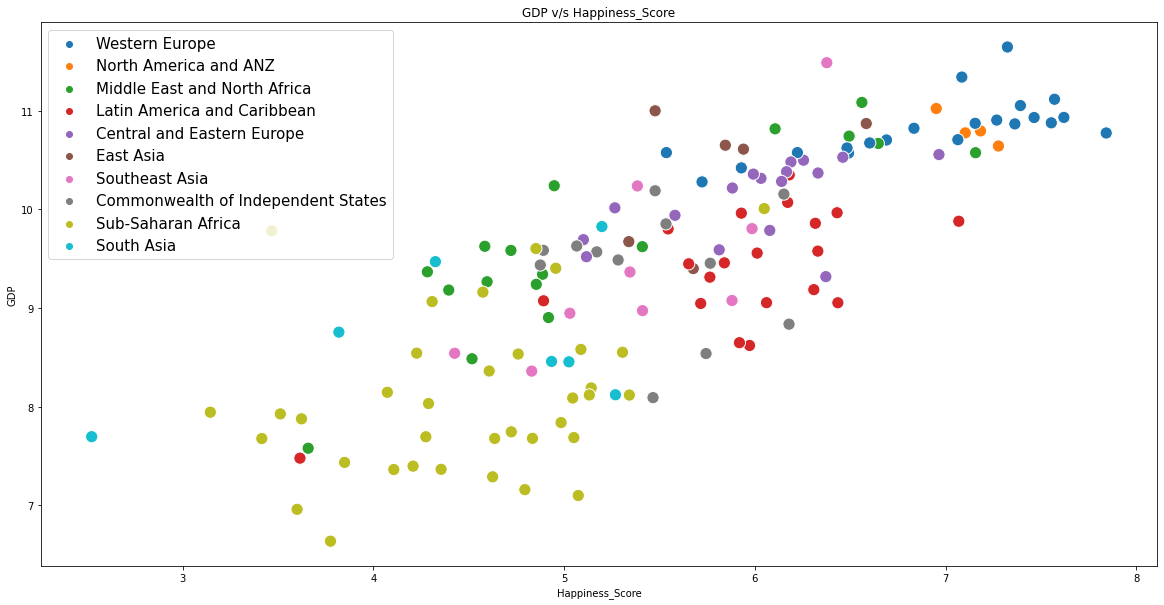

In [11]:
plt.rcParams['figure.figsize'] = (20,10)
sns.scatterplot(x=happy_df.Happiness_Score,y=happy_df.GDP, hue=happy_df.Region,s=150);
plt.legend(loc="upper left", fontsize = "15")
plt.xlabel("Happiness_Score")
plt.ylabel("GDP")
plt.title("GDP v/s Happiness_Score")

In [12]:
gdp_region=happy_df.groupby("Region")["GDP"].sum()
gdp_region

Region
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: GDP, dtype: float64

Text(0, 0.5, '')

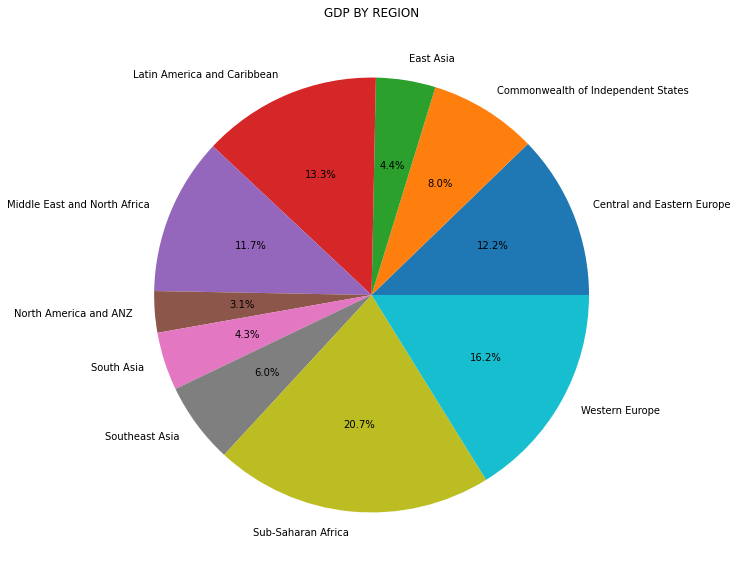

In [13]:
gdp_region.plot.pie(autopct= "%1.1f%%")
plt.title('GDP BY REGION')
plt.ylabel('')


In [14]:
# TOTAL COUNTRY
total_country=happy_df.groupby("Region")[['country']].count()
print(total_country)

                                    country
Region                                     
Central and Eastern Europe               17
Commonwealth of Independent States       12
East Asia                                 6
Latin America and Caribbean              20
Middle East and North Africa             17
North America and ANZ                     4
South Asia                                7
Southeast Asia                            9
Sub-Saharan Africa                       36
Western Europe                           21


<AxesSubplot:>

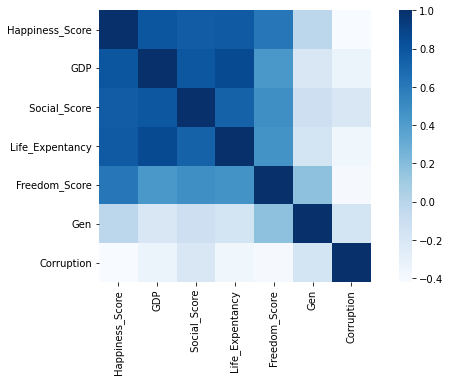

In [16]:
cor=happy_df.corr(method="pearson")
f,ax =plt.subplots(figsize=(10,5))
sns.heatmap(cor,mask=np.zeros_like(cor,dtype=bool),
            cmap="Blues",square=True,ax=ax)

In [21]:
corruption= happy_df.groupby('Region')[['Corruption']].mean()
corruption

,Corruption
Region,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


<BarContainer object of 10 artists>

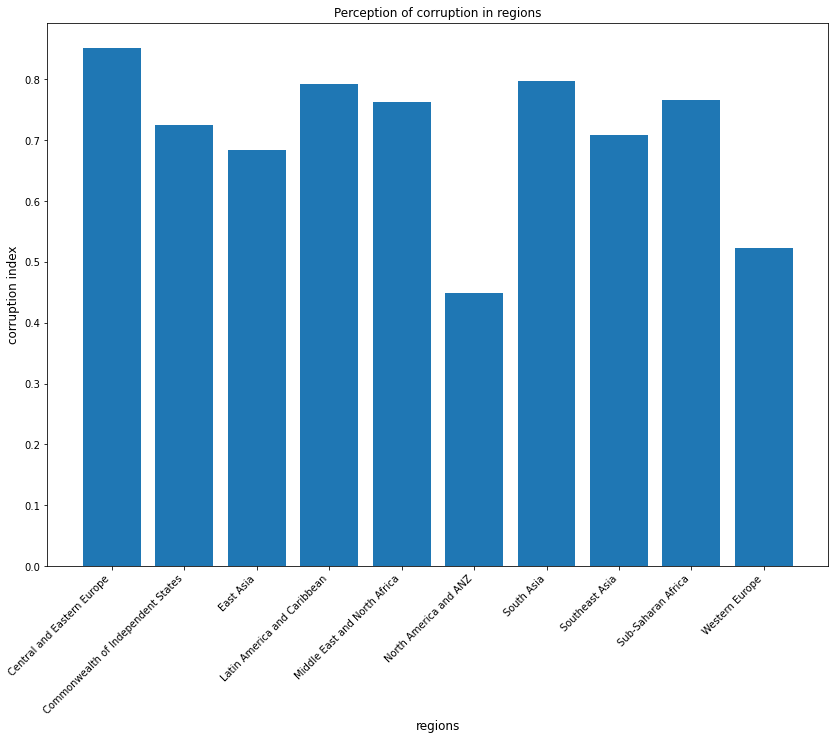

In [31]:
plt.rcParams['figure.figsize']=(14,10)
plt.title('Perception of corruption in regions')
plt.xlabel('regions',fontsize=12)
plt.ylabel('corruption index',fontsize=12)
plt.xticks(rotation=45,ha='right')
plt.bar(corruption.index,corruption.Corruption)

In [32]:
top_10=happy_df.head(10)
bottom_10=happy_df.tail(10)

C:\Users\Hiremath\AppData\Local\Temp\ipykernel_8656\972063769.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
C:\Users\Hiremath\AppData\Local\Temp\ipykernel_8656\972063769.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels,rotation=45,ha='right')


Text(603.9818181818181, 0.5, 'Life_Expentancy')

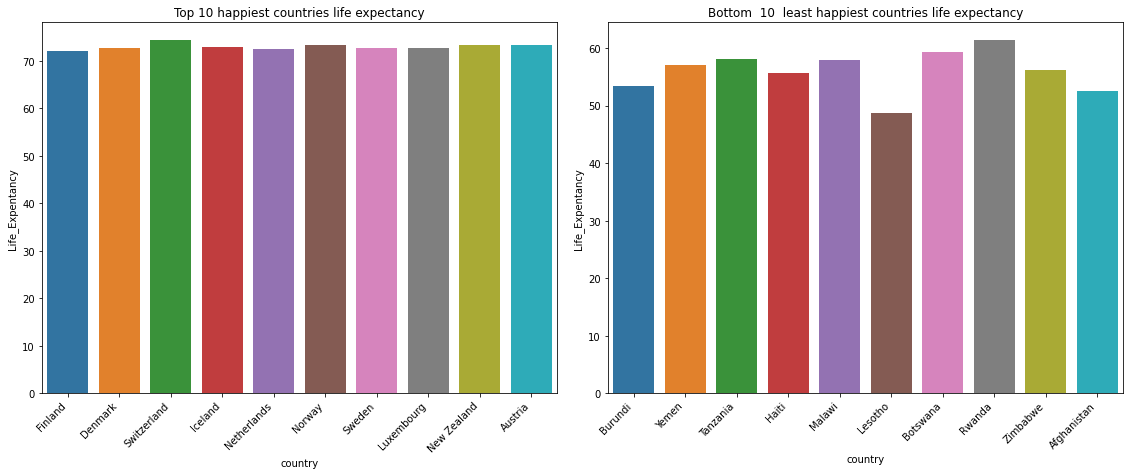

In [42]:
fig,axes=plt.subplots(1,2,figsize=(16,6))
plt.tight_layout(pad=2)
xlabels=top_10.country
axes[0].set_title('Top 10 happiest countries life expectancy')
axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=top_10.country,y=top_10.Life_Expentancy,ax=axes[0])
axes[0].set_xlabel('country')
axes[0].set_ylabel('Life_Expentancy')


xlabels=bottom_10.country
axes[1].set_title('Bottom  10  least happiest countries life expectancy')
axes[1].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=bottom_10.country,y=bottom_10.Life_Expentancy,ax=axes[1])
axes[1].set_xlabel('country')
axes[1].set_ylabel('Life_Expentancy')

Text(0, 0.5, 'Happiness Score')

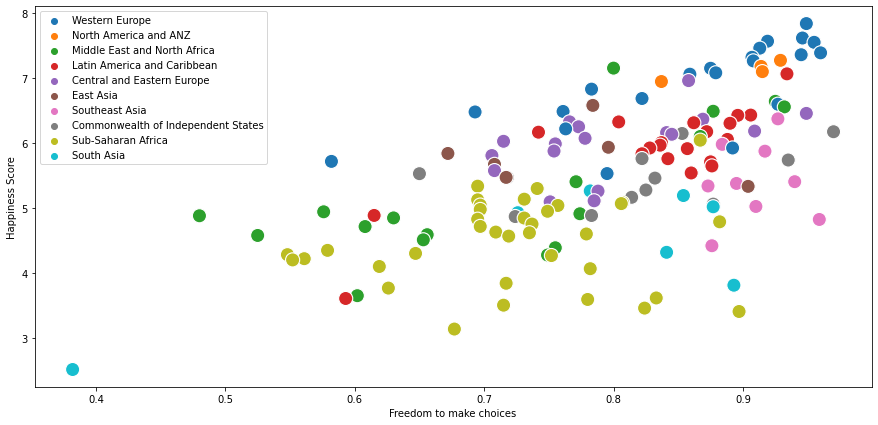

In [47]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=happy_df.Freedom_Score,y=happy_df.Happiness_Score,hue =happy_df.Region,s=200)
plt.legend(loc="upper left",fontsize='10')
plt.xlabel("Freedom to make choices")
plt.ylabel('Happiness Score')

<BarContainer object of 10 artists>

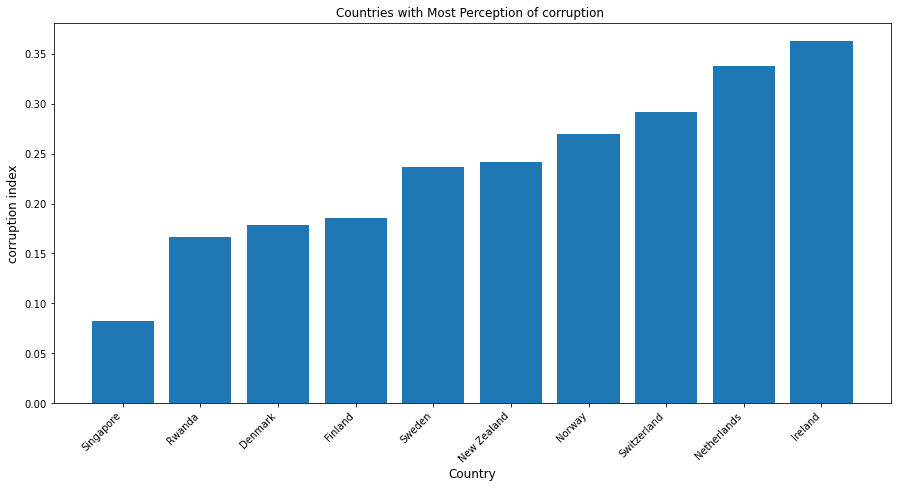

In [48]:
country=happy_df.sort_values(by='Corruption').head(10)
plt.rcParams['figure.figsize']=(15,7)
plt.title('Countries with Most Perception of corruption ')
plt.xlabel('Country',fontsize=12)
plt.ylabel('corruption index',fontsize=12)
plt.xticks(rotation=45,ha='right')
plt.bar(country.country,country.Corruption)


In [49]:
# Corruption vs happiness


Text(0, 0.5, 'Corruption')

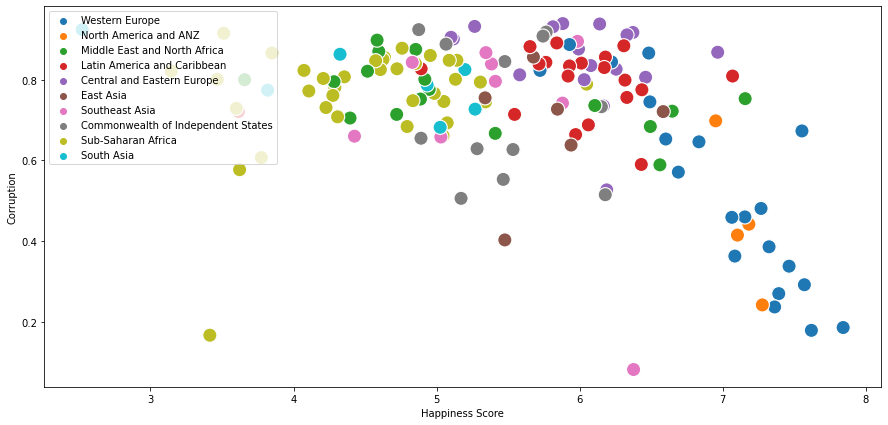

In [50]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=happy_df.Happiness_Score,y=happy_df.Corruption,hue =happy_df.Region,s=200)
plt.legend(loc="upper left",fontsize='10')
plt.xlabel("Happiness Score")
plt.ylabel('Corruption')